In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -U sentence-transformers -q

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# loading embedding model
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
# sentences = ["i am eating an apple", "banana is a fruit", "elon musk is the ceo of tesla", "eat apple everyday keeps doctor away"]

# generating embeddings of 10 sentences of 4 diff categories.
sentences = [
    # Category 1 - Technology
    "The latest smartphone features a powerful processor and a high-resolution display.",
    "Artificial intelligence is revolutionizing the tech industry.",
    "Coding and programming are essential skills for software developers.",

    # Category 2 - Nature
    "The serene beauty of the forest is truly captivating.",
    "Birds chirping in the morning signal the start of a new day.",
    "The sound of ocean waves crashing against the shore is so soothing.",

    # Category 3 - Food
    "I love trying new recipes and experimenting in the kitchen.",
    "Sushi is one of my favorite dishes; I can't get enough of it.",
    "Freshly baked bread with butter is a simple pleasure in life.",

    # Category 4 - Travel
    "Exploring new countries and experiencing different cultures is my passion."
]

embeddings = model.encode(sentences)
print(embeddings.shape)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(10, 384)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(embeddings)

array([[ 1.0000002 ,  0.15377255,  0.07188964,  0.09961864,  0.05697333,
         0.06593596,  0.14493588,  0.00831587,  0.03331002,  0.01392518],
       [ 0.15377255,  1.0000001 ,  0.32483563,  0.11280736,  0.04137964,
         0.02640565,  0.11468821,  0.06118702,  0.02306213,  0.12752214],
       [ 0.07188964,  0.32483563,  1.0000004 ,  0.10819476, -0.06492464,
         0.0941253 ,  0.11980259,  0.06336195,  0.0777878 ,  0.19346678],
       [ 0.09961864,  0.11280736,  0.10819476,  1.0000002 ,  0.15604642,
         0.35400617,  0.15590017,  0.0812884 ,  0.14820358,  0.28686148],
       [ 0.05697333,  0.04137964, -0.06492464,  0.15604642,  1.0000002 ,
         0.29862577,  0.10870332, -0.00646528,  0.08542982,  0.07811816],
       [ 0.06593596,  0.02640565,  0.0941253 ,  0.35400617,  0.29862577,
         0.99999994,  0.1635586 ,  0.2027139 ,  0.16289409,  0.21887214],
       [ 0.14493588,  0.11468821,  0.11980259,  0.15590017,  0.10870332,
         0.1635586 ,  1.0000001 ,  0.3629833 

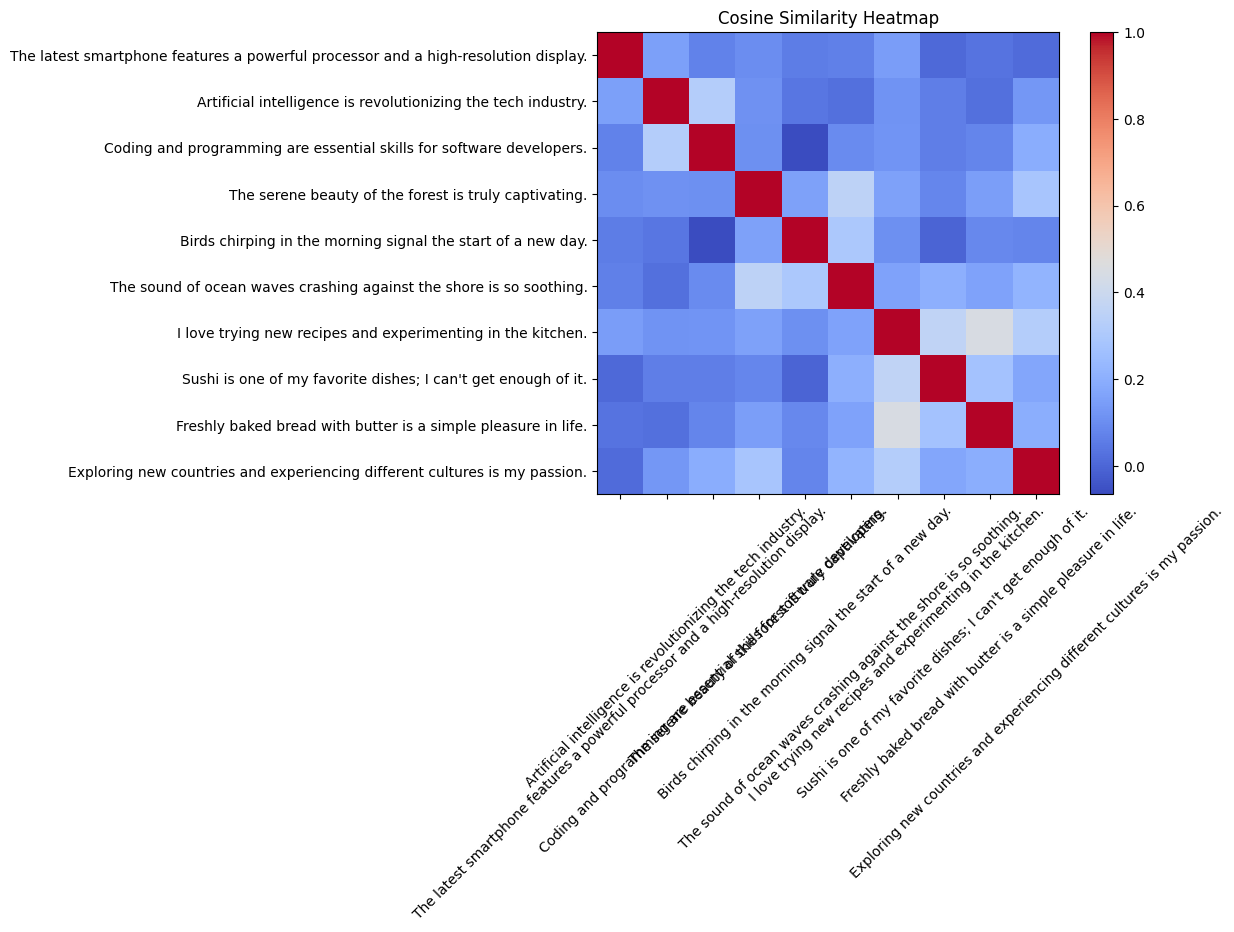

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarity(embeddings), cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(sentences)), sentences, rotation=45)
plt.yticks(np.arange(len(sentences)), sentences)
plt.title('Cosine Similarity Heatmap')
plt.show()

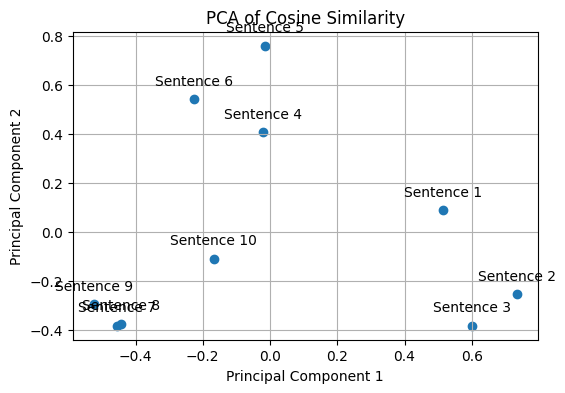

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample cosine similarity matrix (replace with your actual data)
cosine_similarity_matrix = cosine_similarity(embeddings)

# Perform PCA to reduce to two components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(cosine_similarity_matrix)

# Plot the two points
plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o')
for i, (x, y) in enumerate(zip(pca_result[:, 0], pca_result[:, 1])):
    plt.annotate(f'Sentence {i+1}', (x, y), textcoords='offset points', xytext=(0,10), ha='center')

plt.title('PCA of Cosine Similarity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
user_input = "tesla launched a new self driving car"

# Encode user input into embeddings using your model (replace with your actual model)
user_input_embedding = model.encode(user_input)

# Encode all sentences into embeddings using your model (replace with your actual model)
sentences_embeddings = embeddings

# Calculate cosine similarity between user input and all sentences
similarity_scores = cosine_similarity([user_input_embedding], sentences_embeddings)

# Sort sentences by similarity score
sorted_indices = np.argsort(similarity_scores[0])[::-1]

# Get the top 5 most similar sentences"
top_5_similar_sentences = [sentences[i] for i in sorted_indices[:5]]

# Print the top 5 similar sentences
print("Top 5 similar sentences:")
for i, sentence in enumerate(top_5_similar_sentences):
    print(f"{i+1}. {sentence}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Top 5 similar sentences:
1. Artificial intelligence is revolutionizing the tech industry.
2. The latest smartphone features a powerful processor and a high-resolution display.
3. Freshly baked bread with butter is a simple pleasure in life.
4. I love trying new recipes and experimenting in the kitchen.
5. Exploring new countries and experiencing different cultures is my passion.


**doing the same on this movie dataset**

In [ ]:
import pandas as pd
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
print(movies.shape)

(4803, 20)


In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
movies = movies[['id', 'title', 'overview']]
movies

,id,title,overview
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4798,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4799,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4800,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [ ]:
pip install -U sentence-transformers -q

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [ ]:
def get_emmbedings(text):
    return model.encode(text)

In [ ]:
movies['overview'] = movies['overview'].fillna('').astype(str)
movies['overview']

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [ ]:
embeddings = get_emmbedings(movies['overview'])
embeddings.shape

Batches:   0%|          | 0/151 [00:00<?, ?it/s]

(4803, 384)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

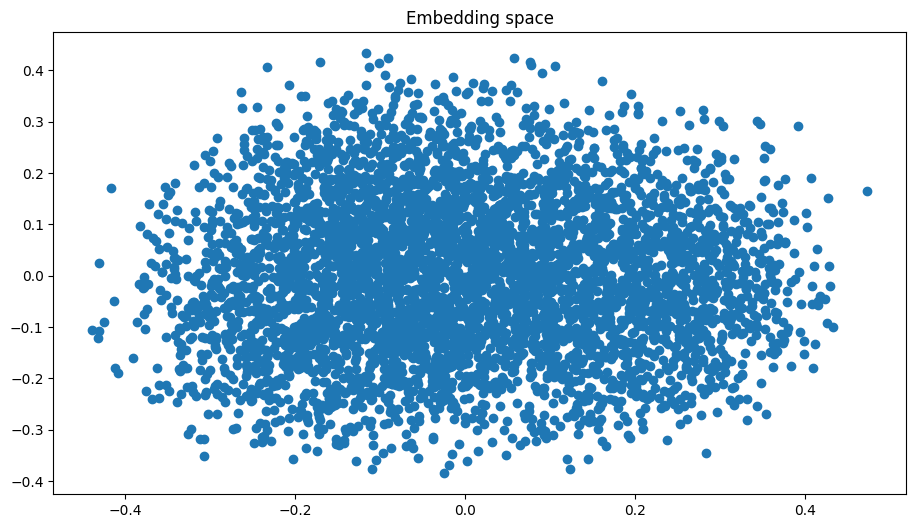

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=5)
nn.fit(embeddings)

NearestNeighbors()

In [ ]:
import pickle
with open('/kaggle/working/nn_rec.pkl', 'wb') as file:
    pickle.dump(nn, file)

In [ ]:
 def recommend(text):
    emb = get_emmbedings([text])
    print(emb)
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    print(movies['title'].iloc[neighbors].tolist())
    return movies['id'].iloc[neighbors].tolist()

In [ ]:
emb = get_emmbedings(["hello"])
print(emb)
print(emb.shape)
print(type(emb))
neighbors = nn.kneighbors(emb, return_distance=False)[0]
print(movies['title'].iloc[neighbors].tolist())

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[-6.27717152e-02  5.49588315e-02  5.21648079e-02  8.57900158e-02
  -8.27488974e-02 -7.45729730e-02  6.85547367e-02  1.83964539e-02
  -8.20112675e-02 -3.73848379e-02  1.21248942e-02  3.51828220e-03
  -4.13427176e-03 -4.37844209e-02  2.18073018e-02 -5.10271639e-03
   1.95465423e-02 -4.23487313e-02 -1.10359646e-01  5.42455819e-03
  -5.57347685e-02  2.80524660e-02 -2.31587496e-02  2.84813810e-02
  -5.37096709e-02 -5.26016243e-02  3.39392461e-02  4.53886539e-02
   2.37184260e-02 -7.31207952e-02  5.47777228e-02  1.70472655e-02
   8.13603625e-02 -2.86272750e-03  1.19580850e-02  7.35585466e-02
  -9.42375064e-02 -8.13620314e-02  4.00153883e-02  6.92151778e-04
  -1.33932577e-02 -5.45380898e-02  5.15140640e-03 -2.61398088e-02
   3.68070938e-02 -3.39596607e-02  2.10932139e-02  5.59488498e-02
   5.77813573e-02 -5.41840354e-03 -6.84131682e-02 -9.02370289e-02
  -4.28667590e-02  2.36526914e-02  1.21493578e-01  3.23928557e-02
  -2.26594321e-02 -2.32817288e-02  4.88659926e-02 -5.93515933e-02
  -3.40659

In [ ]:
recommend("spiderman")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[-9.76752490e-02 -2.87086219e-02 -5.83448708e-02  4.63160127e-03
  -3.52977142e-02 -5.68855554e-03  4.58387807e-02 -3.06458455e-02
  -1.65263601e-02 -1.19670182e-02  3.01106162e-02 -2.32137125e-02
  -3.64358537e-02  5.29426597e-02  6.32181764e-02  7.77990967e-02
   4.57435362e-02  1.89620014e-02  4.08856152e-03 -1.21563077e-02
  -1.54702261e-03  2.50994181e-03  1.13798501e-02 -5.42437099e-02
  -9.85583737e-02  3.20332758e-02  4.44692448e-02 -2.62293685e-02
   1.78320881e-03 -4.60055396e-02 -4.37617209e-03  8.92538484e-03
  -6.98188692e-02 -3.49094905e-02 -5.28020561e-02 -5.66929393e-02
  -8.58127400e-02  5.50293401e-02 -2.42056302e-03  2.42932960e-02
  -8.04560110e-02 -4.88669425e-03  4.95427335e-03 -4.56488393e-02
  -4.27407958e-02 -7.92392418e-02  1.05040353e-02  3.51126976e-02
   4.56495732e-02  2.69247517e-02 -1.65862329e-02  2.02113222e-02
  -7.85482749e-02 -3.33183794e-03  4.22986262e-02 -7.43405819e-02
   2.64107250e-02 -1.02633648e-01  8.74735694e-03 -6.29255250e-02
   7.85809

[559, 1930, 557, 558, 102382]

In [30]:


neighbors = nn.kneighbors([[-6.27717152e-02,  5.49588315e-02,  5.21648079e-02,  8.57900158e-02,
  -8.27488974e-02, -7.45729730e-02,  6.85547367e-02,  1.83964539e-02,
  -8.20112675e-02, -3.73848379e-02,  1.21248942e-02,  3.51828220e-03,
  -4.13427176e-03, -4.37844209e-02,  2.18073018e-02, -5.10271639e-03,
   1.95465423e-02, -4.23487313e-02, -1.10359646e-01,  5.42455819e-03,
  -5.57347685e-02,  2.80524660e-02, -2.31587496e-02,  2.84813810e-02,
  -5.37096709e-02, -5.26016243e-02,  3.39392461e-02,  4.53886539e-02,
   2.37184260e-02, -7.31207952e-02,  5.47777228e-02,  1.70472655e-02,
   8.13603625e-02, -2.86272750e-03,  1.19580850e-02,  7.35585466e-02,
  -9.42375064e-02, -8.13620314e-02,  4.00153883e-02,  6.92151778e-04,
  -1.33932577e-02, -5.45380898e-02,  5.15140640e-03, -2.61398088e-02,
   3.68070938e-02, -3.39596607e-02,  2.10932139e-02,  5.59488498e-02,
   5.77813573e-02, -5.41840354e-03, -6.84131682e-02, -9.02370289e-02,
  -4.28667590e-02,  2.36526914e-02,  1.21493578e-01,  3.23928557e-02,
  -2.26594321e-02, -2.32817288e-02,  4.88659926e-02, -5.93515933e-02,
  -3.40659954e-02,  3.59625854e-02, -8.11578110e-02, -2.19794903e-02,
   1.31879132e-02, -4.58555408e-02, -7.04198107e-02, -5.26032262e-02,
  -4.80292439e-02, -7.45461881e-02, -2.87317932e-02,  1.28318630e-02,
  -4.29216549e-02,  5.36634913e-03, -3.90975885e-02,  1.59192793e-02,
   2.02435553e-02,  5.26672183e-03,  9.58133582e-03, -4.76762606e-03,
   4.80876602e-02, -7.30965808e-02, -5.03444150e-02,  9.65309236e-03,
   1.34965833e-02,  4.30365297e-04,  1.97251942e-02,  6.24955036e-02,
  -1.82271898e-02,  3.10971886e-02, -8.88539031e-02,  4.81324159e-02,
   2.60742530e-02, -1.14940535e-02, -9.93617401e-02, -2.73381788e-02,
   7.62152895e-02, -2.09658314e-03, -1.23588778e-01,  2.98065305e-01,
   5.63063808e-02,  7.84801021e-02,  1.10435756e-02,  5.24000749e-02,
  -1.18802639e-03,  9.65679239e-04, -5.43272980e-02,  2.67647635e-02,
  -1.21942591e-02,  1.07170707e-02, -3.71029018e-05, -3.55656706e-02,
  -3.20855603e-02,  1.61688067e-02,  8.67497474e-02,  1.81394592e-02,
  -1.10175107e-02,  4.97403704e-02,  2.25809980e-02, -2.23380594e-05,
   1.49390884e-02, -1.11761866e-02,  5.65934088e-03, -4.11480898e-03,
   3.18268873e-03,  2.38649994e-02,  1.80510487e-02, -5.85047542e-33,
   5.61070852e-02, -3.44985053e-02,  3.31118293e-02,  1.67722896e-01,
  -3.10381278e-02, -4.83533740e-03, -6.10650070e-02, -6.27110302e-02,
   2.74265874e-02,  6.36401623e-02,  4.33404744e-02,  6.08293228e-02,
  -1.81608666e-02,  4.28040996e-02,  1.90241002e-02,  8.79778787e-02,
  -3.91328596e-02,  4.41426300e-02, -4.94107557e-03,  5.10526821e-02,
  -5.43191247e-02,  1.11730797e-02,  2.66990401e-02,  7.50966072e-02,
   4.86901365e-02, -4.35427576e-02,  1.33386832e-02, -1.02629825e-01,
   5.21566495e-02,  2.22323574e-02, -2.97417827e-02, -4.22706529e-02,
   2.29846034e-02,  3.95744517e-02,  9.09476820e-03,  2.08647121e-02,
   5.09263948e-03, -6.27641156e-02, -5.02176657e-02, -5.22503350e-03,
  -5.34982048e-02,  2.97734998e-02,  2.17536390e-02, -2.06780173e-02,
   2.38661654e-02,  5.80662396e-03, -1.21379131e-03,  2.26602834e-02,
   3.15669808e-03,  3.09604127e-02, -5.29680848e-02,  1.86769664e-02,
  -1.40153438e-01,  4.14781906e-02, -1.02782222e-02, -1.15931109e-02,
  -3.34582441e-02, -5.05889617e-02,  4.68678698e-02,  2.47150548e-02,
   3.34968232e-02,  1.11707598e-01, -4.03486416e-02, -4.28450946e-03,
  -8.07436779e-02, -5.61121926e-02,  3.83386351e-02,  1.15083419e-02,
   6.87379539e-02, -3.81173752e-02, -4.59883176e-02, -1.64396241e-02,
   2.44129766e-02,  1.17221205e-02,  8.16851947e-03,  3.90369184e-02,
   2.61865016e-02,  1.04818521e-02,  4.28601950e-02, -4.63815369e-02,
   6.48111477e-03,  4.44233567e-02, -1.88375916e-02,  7.26333912e-03,
   5.61795309e-02,  5.34779876e-02, -2.14837883e-02, -8.44857544e-02,
  -1.28139630e-02, -3.94756384e-02, -5.80265485e-02,  3.13339941e-02,
   4.54173014e-02,  1.18390908e-02, -1.79063287e-02,  4.58621472e-33,
   1.31507918e-01,  7.93281421e-02, -9.49595496e-02, -2.44722180e-02,
  -5.58161847e-02, -9.14527569e-03, -3.20904441e-02,  1.13793164e-01,
  -1.44416243e-01,  8.50958098e-03,  3.06670126e-02, -1.24148829e-02,
   7.01705143e-02,  2.81798430e-02,  4.08220775e-02,  1.95908174e-02,
   1.42950416e-01,  5.68699799e-02, -4.01220880e-02, -1.78439133e-02,
  -6.13844767e-02,  8.76071514e-04, -5.49061596e-02, -7.10248342e-03,
  -4.94170177e-04, -1.31194312e-02, -2.26693554e-03,  5.85667044e-02,
  -9.97152030e-02, -2.55323928e-02,  7.85646290e-02,  2.05176380e-02,
  -4.63337824e-03,  3.03026419e-02,  1.68332364e-02,  9.14376006e-02,
   1.67697426e-02, -7.98028857e-02,  4.25102673e-02, -8.43973234e-02,
  -2.38590986e-02,  4.70194668e-02,  2.41490616e-03,  1.09317839e-01,
  -3.39053944e-02, -6.40209168e-02, -3.77238467e-02,  2.90747657e-02,
  -4.24493551e-02,  1.58618428e-02, -9.06066075e-02, -5.57663180e-02,
   2.26087719e-02,  8.00029188e-03, -2.24699900e-02,  2.20581889e-02,
  -2.51990929e-02,  3.03395409e-02,  1.01107657e-02, -1.85473599e-02,
   1.69895831e-02,  7.63101801e-02,  4.16206345e-02,  8.75206217e-02,
  -1.20927552e-02,  3.11351772e-02, -3.21904495e-02,  1.27979852e-02,
   1.35387490e-02, -2.97524072e-02,  3.67898643e-02, -5.84605522e-03,
  -1.10554649e-02,  3.86702865e-02, -2.07415111e-02, -1.12651028e-02,
  -2.37675402e-02, -9.98456590e-03, -2.31084507e-02,  1.20113846e-02,
  -1.06445048e-02,  5.13606258e-02, -2.77340766e-02, -2.11361024e-04,
   9.46294225e-04, -3.15826274e-02,  5.12293316e-02,  4.43286262e-02,
  -3.77343665e-03, -4.16681208e-02,  2.89546009e-02,  3.30613144e-02,
  -1.51842926e-02, -1.57688366e-04, -4.41243500e-02, -1.48035024e-08,
  -8.69594328e-03,  1.30080618e-04,  1.64711289e-02,  5.92289381e-02,
   4.55387793e-02,  3.31268795e-02, -9.33585614e-02, -3.90271842e-02,
  -2.06561424e-02,  1.26074925e-02,  6.95395097e-02,  7.91918635e-02,
  -7.19109103e-02, -4.78510838e-03,  8.80047902e-02,  4.75884825e-02,
  -5.21927327e-02, -7.52547197e-03, -5.77118210e-02, -9.29584652e-02,
  -4.50155139e-03,  1.17803260e-03,  2.44472921e-02, -6.40396550e-02,
  -3.22747184e-03, -2.79653557e-02, -3.54075842e-02,  2.50366647e-02,
  -9.85278282e-03,  1.32524213e-02,  1.13847293e-03,  1.78054303e-01,
  -3.61463353e-02, -7.62588857e-03, -3.22012529e-02, -4.22932245e-02,
   4.77453601e-03,  2.85318382e-02,  7.47230425e-02, -1.48941716e-02,
  -5.62207140e-02,  2.72358134e-02, -1.11994324e-02, -1.01667874e-01,
  -1.95292365e-02,  2.72464473e-02,  3.50810438e-02, -8.16056207e-02,
  -1.33775489e-03, -7.63519555e-02, -3.99573743e-02,  4.07818854e-02,
   6.01286814e-02,  7.25458190e-02,  6.96750656e-02,  8.90913010e-02,
   1.59578342e-02, -1.48735614e-02, -4.67416309e-02, -1.34112909e-02,
   6.51347488e-02,  5.09058908e-02,  5.14835641e-02,  7.09218159e-03]], return_distance=False)[0]

neighbors

array([4401, 2656, 4431, 4140, 4327])